# crisp-dm 

## business understanding

**Tujuan**
- Memprediksi biaya untuk menarik/mendapatkan pelanggan (Cost Prediction on acquiring Customers) 
- Mengetahui faktor-faktor yang mempengaruhi biaya -> berdasarkan variabel importance (dari beberapa variabel yang digunakan, mana yang mempengaruhi paling tinggi)
- Mengetahui bagaimana pengaruh biaya terhadap penjualan dan keuntungan perusahaan. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## data understanding

In [139]:
df=pd.read_csv("/content/drive/MyDrive/Studi Independent Great Edu/media prediction and its cost.csv")
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [19]:
df1=df.copy() # df1 digunakan untuk EDA
df1.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [20]:
df.shape

(60428, 40)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

### EDA

#### promosi dengan penjualan tertinggi

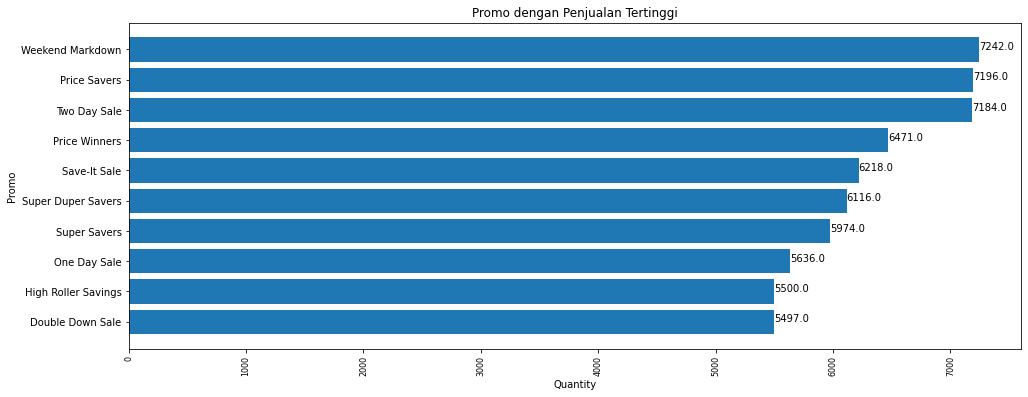

In [24]:
df_category_quantity = df.groupby('promotion_name')['unit_sales(in millions)'].sum().reset_index().sort_values('unit_sales(in millions)')
df_category_quantity= df_category_quantity.tail(10))
plt.figure(figsize=(16,6))
plt.barh(df_category_quantity['promotion_name'], df_category_quantity['unit_sales(in millions)'])

plt.xticks(rotation='vertical', size=8)
plt.xlabel('Quantity')
plt.ylabel('Promo')
plt.title('Promo dengan Penjualan Tertinggi')
for index, value in enumerate(df_category_quantity['unit_sales(in millions)']):
    plt.text(value, index,
             str(value))

plt.show()

Penggunaan promosi yang dilakukan masih belum efektif, dari setiap promosi yang dilakukan memiliki hasil yang berbeda, perusahaan harus jeli melihat promosi yang efektif agar bisa memaksimalkan keuntungan dan memangkas biaya. 


#### penjualan berdasarkan region

In [40]:
top_region = df.groupby('sales_country')['unit_sales(in millions)'].sum().sort_values(ascending=False).head(10)
top_region = top_region.reset_index()

In [41]:
df_tier1=pd.DataFrame(df.loc[df['sales_country'] =='USA'])#for tier 1
df_tier2=pd.DataFrame(df.loc[df['sales_country'] =='Mexico']) #for tier 2
df_tier3=pd.DataFrame(df.loc[df['sales_country'] =='Canada']) #for tier 3

In [42]:
df_tier1_list=df_tier1.groupby("food_department")[["unit_sales(in millions)"]].mean().sort_values(by=['unit_sales(in millions)'],ascending=[False]).reset_index()
df_tier1_list.rename(columns = {'food_department':'Items_Tier_1','unit_sales(in millions)':'Sales_of_USA'}, inplace = True)

df_tier2_list=df_tier2.groupby("food_department")[["unit_sales(in millions)"]].mean().sort_values(by=['unit_sales(in millions)'],ascending=[False]).reset_index()
df_tier2_list.rename(columns = {'food_department':'Items_Tier2','unit_sales(in millions)':'Sales_of_Mexico'}, inplace = True)

df_tier3_list=df_tier3.groupby("food_department")[["unit_sales(in millions)"]].mean().sort_values(by=['unit_sales(in millions)'],ascending=[False]).reset_index()
df_tier3_list.rename(columns = {'food_department':'Items_Tier2','unit_sales(in millions)':'Sales_of_Canada'}, inplace = True)

In [43]:
df_sales=pd.concat([df_tier1_list,df_tier2_list,df_tier3_list],axis=1)
df_sales

,Items_Tier_1,Sales_of_USA,Items_Tier2,Sales_of_Mexico,Items_Tier2,Sales_of_Canada
0,Checkout,3.146444,Canned Products,3.233871,Eggs,3.275862
1,Meat,3.138776,Seafood,3.175926,Deli,3.204545
2,Snacks,3.121524,Snacks,3.153017,Starchy Foods,3.197531
3,Starchy Foods,3.119215,Alcoholic Beverages,3.147992,Snacks,3.184466
4,Breakfast Foods,3.118677,Household,3.134312,Meat,3.181818
5,Carousel,3.113333,Periodicals,3.133094,Produce,3.162455
6,Alcoholic Beverages,3.107738,Snack Foods,3.123131,Household,3.161435
7,Health and Hygiene,3.095436,Deli,3.119326,Baked Goods,3.154545
8,Snack Foods,3.094522,Frozen Foods,3.119048,Snack Foods,3.143791
9,Beverages,3.089240,Beverages,3.113033,Baking Goods,3.135417


In [47]:
import plotly.graph_objects as go   #importing the library
x=df_sales['Items_Tier_1']
y1=df_sales['Sales_of_USA']
y2=df_sales['Sales_of_Mexico']
y3=df_sales['Sales_of_Canada']

# Create traces

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines+markers',line_color='rgb(0,100,80)',
                    name='Sales_of_USA'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines+markers',
                    name='Sales_of_Mexico'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines+markers',
                    name='Sales_of_Canada'))
fig.show()

Beberapa departemen makanan memiliki kesamaan penjualan di setiap negara, namun untuk beberapa departemen tertentu memiliki penjualan yang berbeda di setiap negara. Ini bisa disebabkan oleh karakter atau kebiasaan mengkonsumsi makanan di setiap negara berbeda-beda. 


Untuk penjualan makanan tertinggi berada di USA selanjutnya Mexico dan Canada, hal ini dipengaruhi oleh jumlah toko dan penduduk di setiap negara. Akan tetapi beberapa departemen makanan memiliki kecenderungan kesamaan penjualan di setiap negara, hal ini berarti foodmart belum bisa memanfaatkan segmentasi di setiap negara. Dengan perbedaan jumlah penjualan di setiap negara harusnya bisa dimanfaatkan untuk mendapatkan keuntungan yang maksimal.


#### penjualan berdasarkan produk (food_family)

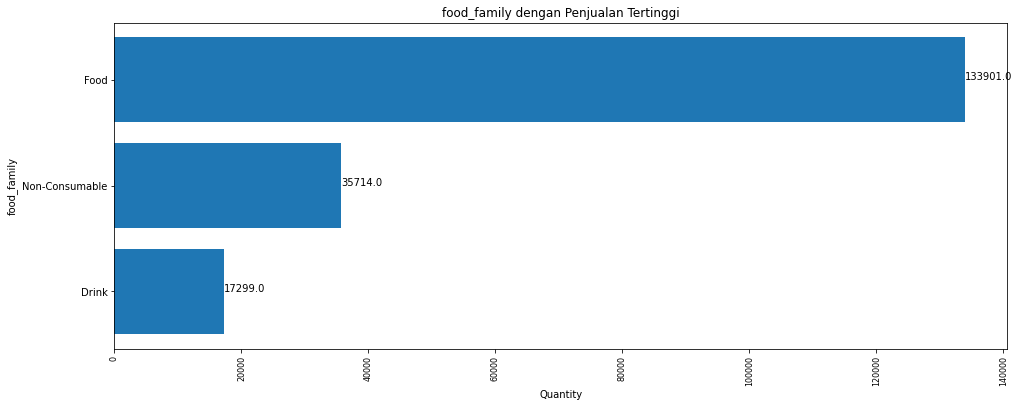

In [50]:
df_category_quantity = df.groupby('food_family')['unit_sales(in millions)'].sum().reset_index().sort_values('unit_sales(in millions)')
plt.figure(figsize=(16,6))
plt.barh(df_category_quantity['food_family'], df_category_quantity['unit_sales(in millions)'])

plt.xticks(rotation='vertical', size=8)
plt.xlabel('Quantity')
plt.ylabel('food_family')
plt.title('food_family dengan Penjualan Tertinggi')
for index, value in enumerate(df_category_quantity['unit_sales(in millions)']):
    plt.text(value, index,
             str(value))

plt.show()

In [53]:
df_category_quantity

,food_family,unit_sales(in millions)
0,Drink,17299.0
2,Non-Consumable,35714.0
1,Food,133901.0


In [54]:
df_category_quantity.sum()

food_family                DrinkNon-ConsumableFood
unit_sales(in millions)                   186914.0
dtype: object

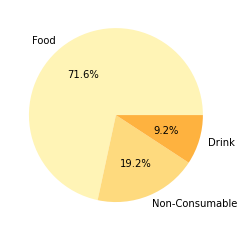

In [57]:
plt.pie(df['food_family'].value_counts(), labels = ["Food", "Non-Consumable", "Drink"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Persentase penjualan makanan sebesar 71.6%, barang non konsumsi sebesar 19.2% dan minuman sebesar 9.2%. Angka ini merupakan nilai yang normal bagi perusahaan foodmart. Dengan fakta bahwa produk paling banyak dijual oleh food mart adalah makanan dan tingkat penjualan produk non konsumsi 19% dengan ketersediaan barang yang lebih rendah dari produk konsumsi maka penjualan produk non konsumsi bisa ditingkatkan.


#### penjualan berdasarkan produk (food_category)

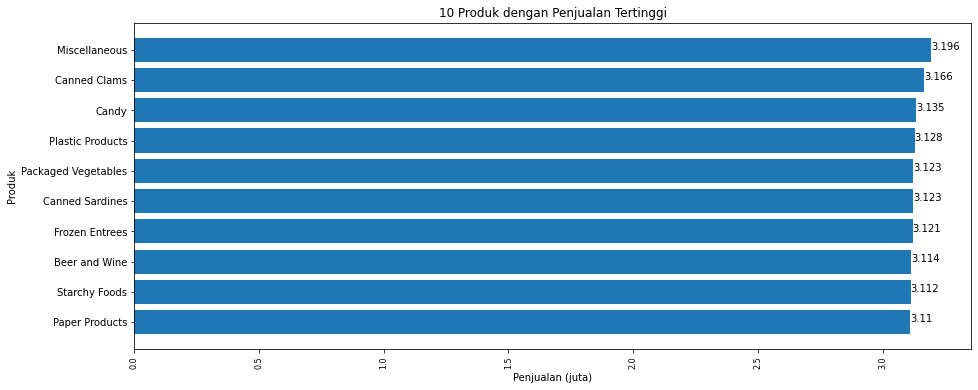

In [140]:
grp_product = df.groupby('food_category')
sales_by_product = round(grp_product['unit_sales(in millions)'].mean().sort_values(ascending=True).reset_index(),3)
sales_by_product = sales_by_product.tail(10)
plt.figure(figsize=(15,6))
plt.barh(sales_by_product[:10]['food_category'], sales_by_product[:10]['unit_sales(in millions)'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Penjualan (juta)')
plt.ylabel('Produk')
plt.title('10 Produk dengan Penjualan Tertinggi')
for index, value in enumerate(sales_by_product[:10]['unit_sales(in millions)']):
    plt.text(value, index,
             str(value))
plt.show()

Berdasarkan gambar di atas, 10 penjualan tertinggi terdiri dari produk lain (miscellaneous), produk plastik, produk kertas yang merupakan produk nonkonsumsi, hal ini menunjukkan bahwa dengan jumlah produk makanan yang lebih banyak dari jenis produk lain membuat pelanggan tidak terpusat ke satu jenis makanan tertentu melainkan menyebar. Kategori makanan dengan penjualan tertinggi masih dominasi oleh kebutuhan pokok dan kategori makanan dengan penjualan rendah didominasi oleh jenis makanan bukan pokok, hal ini sangat wajar karena perusahaan merupakan foodmart. Akan tetapi inovasi produk harus terus dilakukan karena selalu terjadi perubahan konsumsi.

Berdasarkan analisis diketahui adanya kecenderungan harga yang rendah untuk produk makanan yang terlihat dari nilai penjualan tertinggi adalah bukan makanan akan tetapi produk paling tinggi terjual adalah makanan. Harga eceran sangat penting bagi foodmart, biasanya foodmart menetapkan harga eceran yang rendah untuk menarik pelanggan meskipun keuntungan menjadi kecil. Menurut penjualan bersih makanan dengan tingkat penjualan tertinggi adalah makan siap makan, sementara untuk departemen makanan dengan penjualan rendah adalah makanan yang masih bahan belum siap makan
 


#### correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Text(0.5, 1.0, 'Correlation of Features')

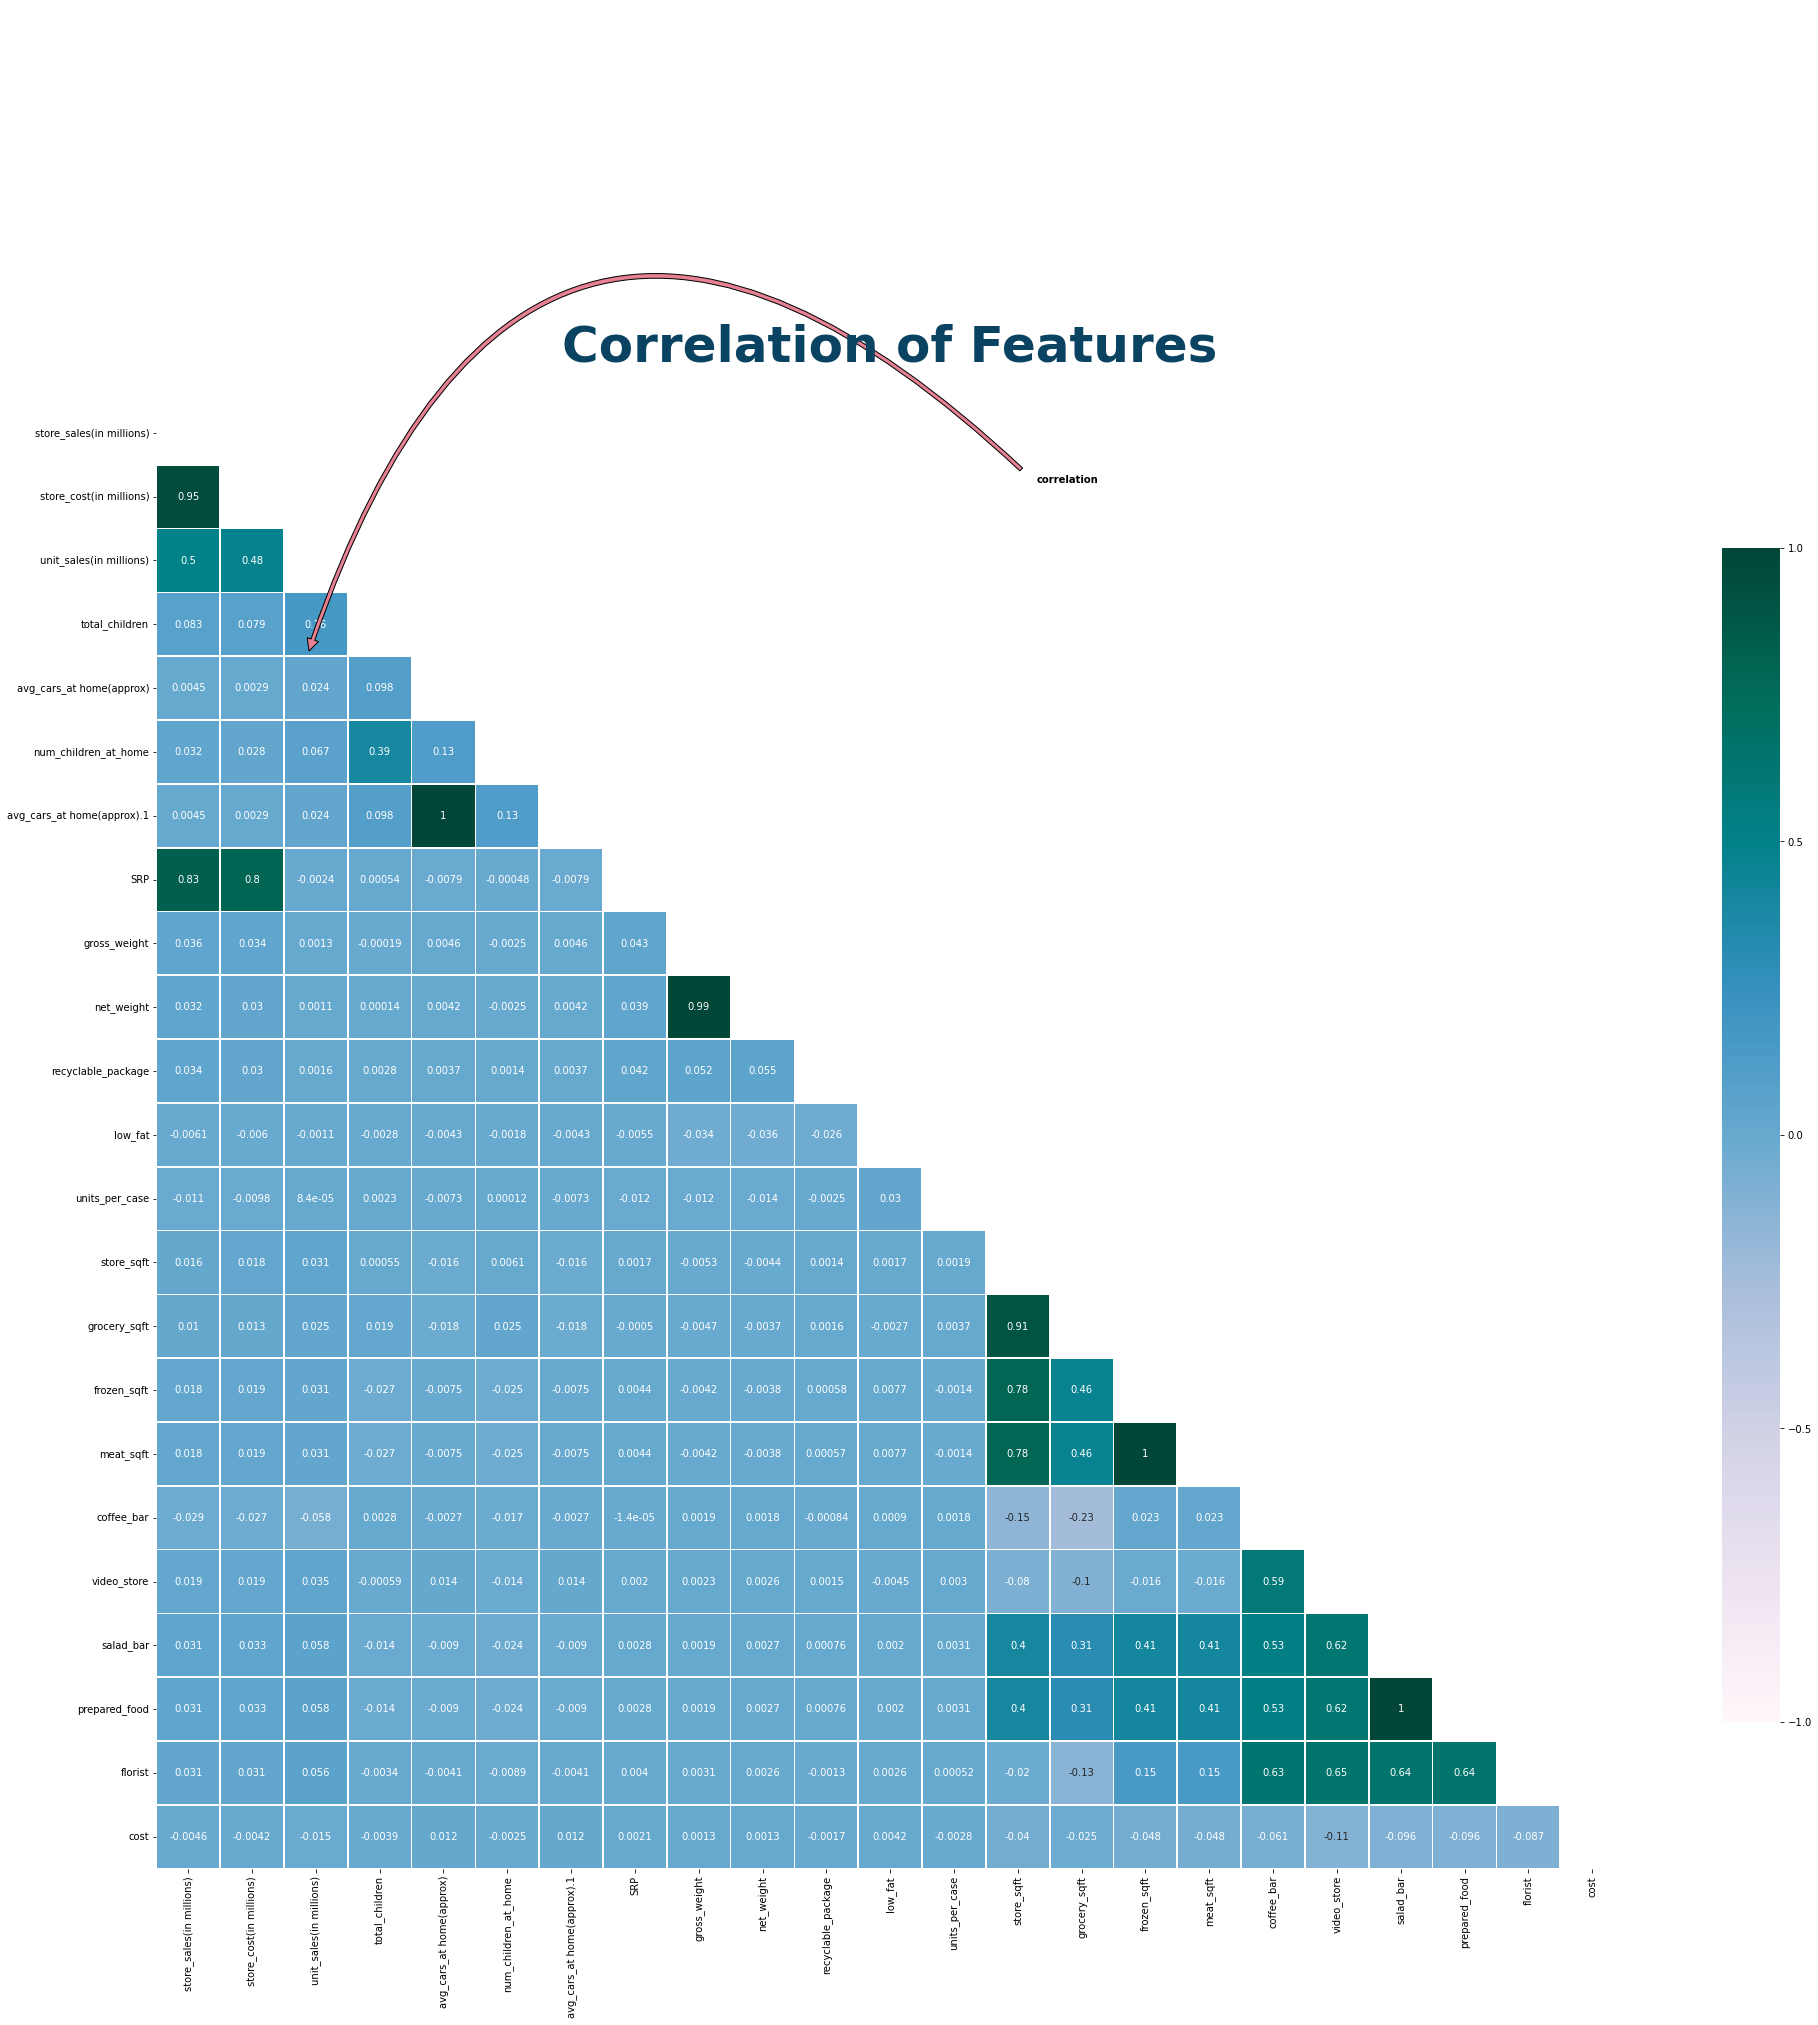

In [64]:
#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True


fig, ax = plt.subplots(figsize=(35, 27))

heatmap = sns.heatmap(df.corr(),
                      mask = mask,
                      square = True,
                      linewidths = .7,
                      cmap = 'PuBuGn',
                      cbar_kws = {'shrink': .8,"ticks" : [-1, -0.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})

#add the column names as labels
ax.set_yticklabels(df.corr(), rotation = 0)
ax.set_xticklabels(df.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

ax.annotate('correlation',
                    fontsize=10,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025, 
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Correlation of Features', size = 50, color = theme[3], weight='bold', pad=40)

- store_sales dan store_cost memiliki korelasi positif dan tinggi dengan nilai sebesar 0,95, hal ini berarti biaya toko (store cost) memiliki pengaruh yang positif terhadap penjualan toko (store sales).

  Dengan nilai korelasi yang tinggi pula dapat disimpulkan bahwa biaya yang dikeluarkan sangat efektif terhadap penjualan. 

- harga eceran (SRP) memiliki korelasi yang tinggi dengan penjualan toko (store_sales) dan biaya toko (store_cost) masing-masing sebesar 0,83 dan 0,8 hal ini menunjukan bahwa penetapan harga sangat mempengaruhi biaya dan penjualan sehingga dapat disimpulkan bahwa penetapan harga eceran akan mempengaruhi keuntungan dengan tingkat signifikan yang cukup tinggi

- jumlah area kebutuhan sehari - hari (grocery_sqft) memiliki korelasi yang rendah terhadap penjualan (unit_sales) dengan nilai korelasi 0,025 begitu halnya dengan area yang lain seperti area makanan beku, area daging, kopi bar, toko video dan salad bar memiliki korelasi yang rendah terhadap penjualan ini menunjukan bahwa area tersebut masih kurang menarik bagi pelanggan.

- dengan adanya coffee bar, salad bar dan video store harus nya memberikan pengaruh yang signifikan terhadap penjualan namun pada kenyataannya coffee bar, salad bar dan video store memiliki pengaruh yang kecil terhadap penjualan.



## data preparation

### drop variabel yang tidak digunakan

In [76]:
# drop variabel yang tidak digunakan (fokus ke supermarketnya)
df.drop(['marital_status', 'gender', 'total_children', 'education', 'member_card', 
         'occupation', 'houseowner', 'avg_cars_at home(approx)', 'avg. yearly_income', 'num_children_at_home',  
         'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat'], axis=1, inplace=True)
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,units_per_case,store_type,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,17.0,Deluxe Supermarket,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,17.0,Deluxe Supermarket,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,17.0,Deluxe Supermarket,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,17.0,Deluxe Supermarket,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,29.0,Deluxe Supermarket,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   units_per_case            60428 non-null  float64
 9   store_type                60428 non-null  object 
 10  store_city                60428 non-null  object 
 11  store_state               60428 non-null  object 
 12  store_sqft                60428 non-null  float64
 13  grocery_sqft              60428 non-null  float64
 14  frozen

### mengubah tipe data

In [78]:
# mengubah tipe data 
df['coffee_bar'] = df['coffee_bar'].astype('object')
df['video_store'] = df['video_store'].astype('object')
df['salad_bar'] = df['salad_bar'].astype('object')
df['prepared_food'] = df['prepared_food'].astype('object')
df['florist'] = df['florist'].astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   food_category             60428 non-null  object 
 1   food_department           60428 non-null  object 
 2   food_family               60428 non-null  object 
 3   store_sales(in millions)  60428 non-null  float64
 4   store_cost(in millions)   60428 non-null  float64
 5   unit_sales(in millions)   60428 non-null  float64
 6   promotion_name            60428 non-null  object 
 7   sales_country             60428 non-null  object 
 8   units_per_case            60428 non-null  float64
 9   store_type                60428 non-null  object 
 10  store_city                60428 non-null  object 
 11  store_state               60428 non-null  object 
 12  store_sqft                60428 non-null  float64
 13  grocery_sqft              60428 non-null  float64
 14  frozen

In [79]:
# unique number of numeric variable
columns = df.columns
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

unique number of store_sales(in millions) -> 1033
unique number of store_cost(in millions) -> 9919
unique number of unit_sales(in millions) -> 6
unique number of units_per_case -> 36
unique number of store_sqft -> 20
unique number of grocery_sqft -> 20
unique number of frozen_sqft -> 20
unique number of meat_sqft -> 20
unique number of cost -> 328


In [80]:
# unique number of categorical variable
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("unique number of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

unique number of food_category -> 45
unique number of food_department -> 22
unique number of food_family -> 3
unique number of promotion_name -> 49
unique number of sales_country -> 3
unique number of store_type -> 5
unique number of store_city -> 19
unique number of store_state -> 10
unique number of coffee_bar -> 2
unique number of video_store -> 2
unique number of salad_bar -> 2
unique number of prepared_food -> 2
unique number of florist -> 2
unique number of media_type -> 13


In [81]:
unique_values = {column: list(df[column].unique()) for column in df.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

food_category : ['Breakfast Foods', 'Bread', 'Canned Shrimp', 'Baking Goods', 'Vegetables', 'Frozen Desserts', 'Candy', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Cleaning Supplies', 'Decongestants', 'Meat', 'Hot Beverages', 'Jams and Jellies', 'Carbonated Beverages', 'Seafood', 'Specialty', 'Kitchen Products', 'Electrical', 'Beer and Wine', 'Candles', 'Fruit', 'Pure Juice Beverages', 'Canned Soup', 'Paper Products', 'Canned Tuna', 'Eggs', 'Hardware', 'Canned Sardines', 'Canned Clams', 'Pain Relievers', 'Side Dishes', 'Bathroom Products', 'Magazines', 'Frozen Entrees', 'Pizza', 'Cold Remedies', 'Canned Anchovies', 'Drinks', 'Hygiene', 'Plastic Products', 'Canned Oysters', 'Packaged Vegetables', 'Miscellaneous']
food_department : ['Frozen Foods', 'Baked Goods', 'Canned Foods', 'Baking Goods', 'Produce', 'Snacks', 'Snack Foods', 'Dairy', 'Starchy Foods', 'Household', 'Health and Hygiene', 'Meat', 'Beverages', 'Seafood', 'Deli', 'Alcoholic Beverages', 'Canned Products', 'Eggs', 'Periodical

In [83]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
count,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000,60428.000000
mean,6.541031,2.619460,3.093169,18.860694,27988.477494,19133.799696,5312.852552,3541.846280,99.262366
std,3.463047,1.453009,0.827677,10.258555,5701.022090,3987.395735,1575.907263,1050.471635,30.011257
min,0.510000,0.163200,1.000000,1.000000,20319.000000,13305.000000,2452.000000,1635.000000,50.790000
25%,3.810000,1.500000,3.000000,10.000000,23593.000000,16232.000000,4746.000000,3164.000000,69.650000
50%,5.940000,2.385600,3.000000,19.000000,27694.000000,18670.000000,5062.000000,3375.000000,98.520000
75%,8.670000,3.484025,4.000000,28.000000,30797.000000,22123.000000,5751.000000,3834.000000,126.620000
max,22.920000,9.726500,6.000000,36.000000,39696.000000,30351.000000,9184.000000,6122.000000,149.750000


Terlihat perbedaan rentang nilai antara variabel dengan tipe data numerik, sehingga perlu dilakukan standarisasi

### standarisasi

In [84]:
# standarisasi
df["store_sales(in millions)"] = (df["store_sales(in millions)"] - df["store_sales(in millions)"].mean()) / df["store_sales(in millions)"].std()
df["store_cost(in millions)"] = (df["store_cost(in millions)"] - df["store_cost(in millions)"].mean()) / df["store_cost(in millions)"].std()
df["unit_sales(in millions)"] = (df["unit_sales(in millions)"] - df["unit_sales(in millions)"].mean()) / df["unit_sales(in millions)"].std()
df["units_per_case"] = (df["units_per_case"] - df["units_per_case"].mean()) / df["units_per_case"].std()
df["store_sqft"] = (df["store_sqft"] - df["store_sqft"].mean()) / df["store_sqft"].std()

df["grocery_sqft"] = (df["grocery_sqft"] - df["grocery_sqft"].mean()) / df["grocery_sqft"].std()
df["frozen_sqft"] = (df["frozen_sqft"] - df["frozen_sqft"].mean()) / df["frozen_sqft"].std()
df["meat_sqft"] = (df["meat_sqft"] - df["meat_sqft"].mean()) / df["meat_sqft"].std()

df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,units_per_case,store_type,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,0.236488,0.071397,1.095634,Bag Stuffers,USA,-0.181380,Deluxe Supermarket,...,-0.116316,0.064818,0.064879,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,-0.294836,-0.017247,-0.112567,Cash Register Lottery,USA,-0.181380,Deluxe Supermarket,...,-0.116316,0.064818,0.064879,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,-0.826160,-0.865693,-1.320767,High Roller Savings,USA,-0.181380,Deluxe Supermarket,...,-0.116316,0.064818,0.064879,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,-0.826160,-0.992327,-1.320767,Cash Register Lottery,USA,-0.181380,Deluxe Supermarket,...,-0.116316,0.064818,0.064879,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,-0.710655,-0.819995,-0.112567,Double Down Sale,USA,0.988376,Deluxe Supermarket,...,-0.116316,0.064818,0.064879,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [85]:
df.describe()

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
count,6.042800e+04,6.042800e+04,6.042800e+04,6.042800e+04,6.042800e+04,6.042800e+04,6.042800e+04,6.042800e+04,60428.000000
mean,3.480516e-16,-5.644081e-18,2.169444e-17,3.809755e-17,1.853728e-16,4.453532e-16,-9.136356e-17,-1.299314e-16,99.262366
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,30.011257
min,-1.741539e+00,-1.690464e+00,-2.528968e+00,-1.741054e+00,-1.345281e+00,-1.461806e+00,-1.815369e+00,-1.815229e+00,50.790000
25%,-7.886208e-01,-7.704424e-01,-1.125665e-01,-8.637370e-01,-7.709982e-01,-7.277431e-01,-3.596992e-01,-3.596920e-01,69.650000
50%,-1.735555e-01,-1.609485e-01,-1.125665e-01,1.357952e-02,-5.165346e-02,-1.163164e-01,-1.591798e-01,-1.588299e-01,98.520000
75%,6.147678e-01,5.950174e-01,1.095634e+00,8.908961e-01,4.926349e-01,7.496623e-01,2.780287e-01,2.781167e-01,126.620000
max,4.729642e+00,4.891258e+00,3.512036e+00,1.670733e+00,2.053583e+00,2.813165e+00,2.456456e+00,2.456186e+00,149.750000


### mengecek missing value dan data duplikat

In [86]:
# mengecek missing value
print(df.isnull().sum().to_markdown())

|                          |   0 |
|:-------------------------|----:|
| food_category            |   0 |
| food_department          |   0 |
| food_family              |   0 |
| store_sales(in millions) |   0 |
| store_cost(in millions)  |   0 |
| unit_sales(in millions)  |   0 |
| promotion_name           |   0 |
| sales_country            |   0 |
| units_per_case           |   0 |
| store_type               |   0 |
| store_city               |   0 |
| store_state              |   0 |
| store_sqft               |   0 |
| grocery_sqft             |   0 |
| frozen_sqft              |   0 |
| meat_sqft                |   0 |
| coffee_bar               |   0 |
| video_store              |   0 |
| salad_bar                |   0 |
| prepared_food            |   0 |
| florist                  |   0 |
| media_type               |   0 |
| cost                     |   0 |


In [87]:
# duplicate data
df.duplicated().sum()

67

tidak terdapat missing value, namun terdapat data duplikat sehingga perlu di drop

In [88]:
# drop duplicate data
df.drop_duplicates(inplace=True)

In [89]:
df.duplicated().sum()

0

### encoding variabel

In [92]:
# separating categorical and numerical columns
num_cols   = ['store_sales(in millions)','store_cost(in millions)','unit_sales(in millions)','units_per_case','store_sqft',
              'grocery_sqft','frozen_sqft','meat_sqft','cost']

# multi category columns
multi_cols = ['food_category','food_department','food_family','promotion_name','sales_country',
              'store_type','store_city','store_state','coffee_bar','video_store','salad_bar',
              'prepared_food','florist','media_type']

In [90]:
# encoding variabel
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == object:
        df[i]= label.fit_transform(df[i])

In [93]:
df

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,units_per_case,store_type,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4,12,1,0.236488,0.071397,1.095634,0,2,-0.181380,0,...,-0.116316,0.064818,0.064879,1,1,1,1,1,3,126.62
1,4,12,1,-0.294836,-0.017247,-0.112567,6,2,-0.181380,0,...,-0.116316,0.064818,0.064879,1,1,1,1,1,3,59.86
2,4,12,1,-0.826160,-0.865693,-1.320767,18,2,-0.181380,0,...,-0.116316,0.064818,0.064879,1,1,1,1,1,3,84.16
3,4,12,1,-0.826160,-0.992327,-1.320767,6,2,-0.181380,0,...,-0.116316,0.064818,0.064879,1,1,1,1,1,5,95.78
4,4,12,1,-0.710655,-0.819995,-0.112567,11,2,0.988376,0,...,-0.116316,0.064818,0.064879,1,1,1,1,1,7,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,42,7,2,-1.091822,-0.891020,-2.528968,48,2,0.695937,3,...,-0.956213,-0.646518,-0.646230,1,0,0,0,0,5,95.25
60424,42,7,2,-1.426787,-1.461422,-2.528968,24,2,1.670733,3,...,-0.956213,-0.646518,-0.646230,1,0,0,0,0,9,69.42
60425,42,7,2,-0.294836,-0.055237,-1.320767,47,2,0.695937,3,...,-0.956213,-0.646518,-0.646230,1,0,0,0,0,11,67.51
60426,42,7,2,0.502150,-0.036242,-0.112567,31,0,0.695937,2,...,2.088882,-0.710608,-0.710963,1,0,0,0,1,9,132.88


## modeling

In [96]:
# seperating dependent and independent variables 
X = df.drop(labels='cost',axis=1)
y = df['cost']

In [97]:
from sklearn.model_selection import train_test_split

# split data training dan testing dengan perbandingan masing-masing 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [98]:
X_train.shape

(48288, 22)

In [99]:
X_test.shape

(12073, 22)

In [100]:
y_train.shape

(48288,)

In [101]:
y_test.shape

(12073,)

In [102]:
df.shape

(60361, 23)

In [103]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score

### linear regression

In [104]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)

LinearRegression()

In [105]:
#error training Linear Regression
predicted_linreg = model_linreg.predict(X_train)
print("Hasil MSE dari LinearRegression data training",mean_squared_error(y_train, predicted_linreg))
print("Hasil RMSE dari LinearRegression data training", math.sqrt(mean_squared_error(y_train, predicted_linreg)))
print('Rsquare Linear Regressor: ', r2_score(y_train, predicted_linreg))

Hasil MSE dari LinearRegression data training 870.0147271449989
Hasil RMSE dari LinearRegression data training 29.49601205493717
Rsquare Linear Regressor:  0.03271425782849047


In [106]:
#error testing Linear Regression
predicted_linreg1 = model_linreg.predict(X_test)
print("Hasil MSE dari LinearRegression data testing",mean_squared_error(y_test, predicted_linreg1))
print("Hasil RMSE dari LinearRegression data testing", math.sqrt(mean_squared_error(y_test, predicted_linreg1)))
print('Rsquare Linear Regressor: ', r2_score(y_test, predicted_linreg1))

Hasil MSE dari LinearRegression data testing 872.2784387268556
Hasil RMSE dari LinearRegression data testing 29.53436030671488
Rsquare Linear Regressor:  0.036980679670279626


### xgboost regressor

In [107]:
## XGBoost Regressor
from xgboost import XGBRegressor
import xgboost as xgb

model_xgb = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 1000)
model_xgb.fit(X_train, y_train)

[08:06:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=1000)

In [108]:
#error training XGBoost 
predicted_xgb = model_xgb.predict(X_train)
print("Hasil MSE dari XGBoost data training",mean_squared_error(y_train, predicted_xgb))
print("Hasil RMSE dari XGBoost data training", math.sqrt(mean_squared_error(y_train, predicted_xgb)))
print('Rsquare XGBoost: ', r2_score(y_train, predicted_xgb))

Hasil MSE dari XGBoost data training 6.8362988634528845
Hasil RMSE dari XGBoost data training 2.6146316879156966
Rsquare XGBoost:  0.992399376454763


In [109]:
#error testing XGBoost
predicted_xgb1 = model_xgb.predict(X_test)
print("Hasil MSE dari XGBoost data testing",mean_squared_error(y_test, predicted_xgb1))
print("Hasil RMSE dari XGBoost data testing", math.sqrt(mean_squared_error(y_test, predicted_xgb1)))
print('Rsquare XGBoost: ', r2_score(y_test, predicted_xgb1))

Hasil MSE dari XGBoost data testing 9.988943818035569
Hasil RMSE dari XGBoost data testing 3.160529040846733
Rsquare XGBoost:  0.9889719320581892


### decision tree regressor

In [110]:
## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [111]:
#error training DTR
predicted_dtr = model_dtr.predict(X_train)
print("Hasil MSE dari DecisionTree data training",mean_squared_error(y_train, predicted_dtr))
print("Hasil RMSE dari DecisionTree data training", math.sqrt(mean_squared_error(y_train, predicted_dtr)))
print('Rsquare DecisionTree: ', r2_score(y_train, predicted_dtr))

Hasil MSE dari DecisionTree data training 8.649919630710328e-26
Hasil RMSE dari DecisionTree data training 2.9410745707496654e-13
Rsquare DecisionTree:  1.0


In [112]:
#error testing DTR
predicted_dtr1 = model_dtr.predict(X_test)
print("Hasil MSE dari DecisionTree data testing",mean_squared_error(y_test, predicted_dtr1))
print("Hasil RMSE dari DecisionTree data testing", math.sqrt(mean_squared_error(y_test, predicted_dtr1)))
print('Rsquare DecisionTree: ', r2_score(y_test, predicted_dtr1))

Hasil MSE dari DecisionTree data testing 3.312774223473868
Hasil RMSE dari DecisionTree data testing 1.82010280574309
Rsquare DecisionTree:  0.996342606397847


### support vector regressor

In [113]:
## support vector regressor
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train, y_train)

SVR()

In [114]:
#error training support vector regressor
predicted_svm = model_svm.predict(X_train)
print("Hasil MSE dari SupportVectorRegressor data training",mean_squared_error(y_train, predicted_svm))
print("Hasil RMSE dari SupportVectorRegressor data training", math.sqrt(mean_squared_error(y_train, predicted_svm)))
print('Rsquare SupportVectorRegressor: ', r2_score(y_train, predicted_svm))

Hasil MSE dari SupportVectorRegressor data training 884.4719216764912
Hasil RMSE dari SupportVectorRegressor data training 29.74007265755232
Rsquare SupportVectorRegressor:  0.0166406929728673


In [115]:
#error testing support vector regressor
predicted_svm1 = model_svm.predict(X_test)
print("Hasil MSE dari SupportVectorRegressor data testing",mean_squared_error(y_test, predicted_svm1))
print("Hasil RMSE dari SupportVectorRegressor data testing", math.sqrt(mean_squared_error(y_test, predicted_svm1)))
print('Rsquare SupportVectorRegressor : ', r2_score(y_test, predicted_svm1))

Hasil MSE dari SupportVectorRegressor data testing 892.6283798440253
Hasil RMSE dari SupportVectorRegressor data testing 29.87688705076259
Rsquare SupportVectorRegressor :  0.014513786539216866


### random forest

In [116]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
#error training random forest
predicted_rf = model_rf.predict(X_train)
print("Hasil MSE dari RandomForest data training",mean_squared_error(y_train, predicted_rf))
print("Hasil RMSE dari RandomForest data training", math.sqrt(mean_squared_error(y_train, predicted_rf)))
print('Rsquare RandomForest : ', r2_score(y_train, predicted_rf))

Hasil MSE dari RandomForest data training 0.27924295008532646
Hasil RMSE dari RandomForest data training 0.5284344330996291
Rsquare RandomForest :  0.9996895366069195


In [118]:
#error testing random forest
predicted_rf1 = model_rf.predict(X_test)
print("Hasil MSE dari RandomForest data testing",mean_squared_error(y_test, predicted_rf1))
print("Hasil RMSE dari RandomForest data testing", math.sqrt(mean_squared_error(y_test, predicted_rf1)))
print('Rsquare RandomForest : ', r2_score(y_test, predicted_rf1))

Hasil MSE dari RandomForest data testing 1.5735921231061036
Hasil RMSE dari RandomForest data testing 1.2544290028160636
Rsquare RandomForest :  0.9982627111371896


## evaluation

In [119]:
print('Linear Regressor R2 Score on Validation set :', r2_score(y_test, predicted_linreg1))
print('XGBoost R2 Score on Validation set :', r2_score(y_test, predicted_xgb1))
print('DecisionTree R2 Score on Validation set :', r2_score(y_test, predicted_dtr1))
print('SupportVectorRegressor R2 Score on Validation set :', r2_score(y_test, predicted_svm1))
print('Random Forest R2 Score on Validation set :', r2_score(y_test, predicted_rf1))

Linear Regressor R2 Score on Validation set : 0.036980679670279626
XGBoost R2 Score on Validation set : 0.9889719320581892
DecisionTree R2 Score on Validation set : 0.996342606397847
SupportVectorRegressor R2 Score on Validation set : 0.014513786539216866
Random Forest R2 Score on Validation set : 0.9982627111371896


Berdasarkan nilai Rsquare tertinggi, maka model terbaik yaitu Random Forest

### perbandingan model

In [120]:
prediksi= {"nilai aktual": y_test, "nilai prediksi regresi linear": predicted_linreg1, "nilai prediksi xgboost": predicted_xgb1, "nilai prediksi decision tree": predicted_dtr1, "nilai prediksi support vector": predicted_svm1, "nilai prediksi random forest": predicted_rf1}
prediksi_df = pd.DataFrame(prediksi)
prediksi_df = prediksi_df.reset_index(drop=True)
prediksi_df

,nilai aktual,nilai prediksi regresi linear,nilai prediksi xgboost,nilai prediksi decision tree,nilai prediksi support vector,nilai prediksi random forest
0,65.70,91.811156,65.863014,65.70,91.975268,65.70
1,68.15,100.091410,66.794624,68.15,96.151099,68.15
2,103.65,100.127702,113.403725,103.65,86.716689,103.65
3,121.44,102.001495,121.304512,121.44,104.948062,121.44
4,81.85,104.087019,81.996071,81.85,104.953983,81.85
...,...,...,...,...,...,...
12068,131.75,90.062464,126.889175,131.75,93.708774,131.75
12069,68.97,97.457408,71.768250,68.97,113.341409,68.97
12070,89.37,98.108370,91.370544,89.37,100.984575,89.37
12071,140.57,104.393948,138.887436,140.57,104.154396,140.57


In [121]:
prediksi_df.max()

nilai aktual                     149.750000
nilai prediksi regresi linear    117.650783
nilai prediksi xgboost           153.421814
nilai prediksi decision tree     149.750000
nilai prediksi support vector    118.162642
nilai prediksi random forest     149.080000
dtype: float64

In [122]:
prediksi_df.min()

nilai aktual                     50.790000
nilai prediksi regresi linear    86.887025
nilai prediksi xgboost           48.398613
nilai prediksi decision tree     50.790000
nilai prediksi support vector    77.873328
nilai prediksi random forest     50.790000
dtype: float64

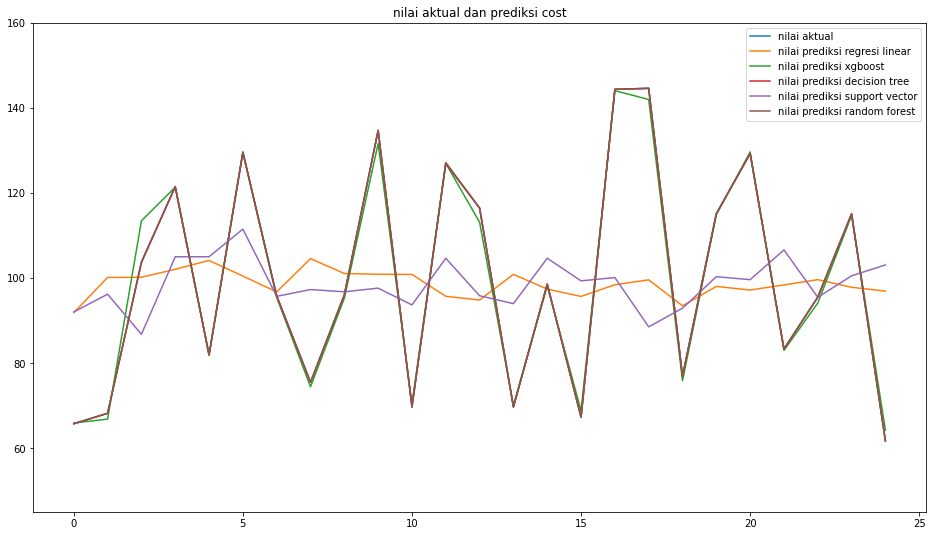

In [123]:
prediksi = pd.DataFrame({"nilai aktual": y_test, "nilai prediksi regresi linear": predicted_linreg1, "nilai prediksi xgboost": predicted_xgb1, "nilai prediksi decision tree": predicted_dtr1, "nilai prediksi support vector": predicted_svm1, "nilai prediksi random forest": predicted_rf1})
figs=plt.figure(figsize=(16,9))
prediksi = prediksi.reset_index(drop=True)
plt.plot(prediksi[:25])
plt.legend(["nilai aktual", "nilai prediksi regresi linear", "nilai prediksi xgboost", "nilai prediksi decision tree", "nilai prediksi support vector", "nilai prediksi random forest"])
plt.title("nilai aktual dan prediksi cost")
plt.ylim(45,160)
plt.show()

### prediction

In [126]:
# mencari pengaruh jenis promosi
# masukin angka

newbusiness = []   
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':0,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    })   
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':6,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    }) 
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':18,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    }) 
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':11,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    }) 
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':16,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    }) 
newbusiness.append({'food_category':4, 'food_department':12, 'food_family':1,'store_sales(in millions)':7.36,'store_cost(in millions)':2.7232,
                    'unit_sales(in millions)':4, 'promotion_name':0,'sales_country':2,'units_per_case':17, 'store_type':0,
                    'store_city':12, 'store_state':5,'store_sqft':27694,'grocery_sqft':18670, 'frozen_sqft':5415,
                    'meat_sqft':3610, 'coffee_bar':1, 'video_store':1, 'salad_bar':1, 'prepared_food':1,
                    'florist':1, 'media_type':3
                    }) 
newbusiness = pd.DataFrame(newbusiness)


Keterangan promotion_name 

0: Bag Stuffers

6 : Cash Register Lottery

18 : High Roller Savings

11 : Double Down Sale

16 : Green Light Days


In [127]:
newbusiness

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,units_per_case,store_type,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,4,12,1,7.36,2.7232,4,0,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3
1,4,12,1,7.36,2.7232,4,6,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3
2,4,12,1,7.36,2.7232,4,18,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3
3,4,12,1,7.36,2.7232,4,11,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3
4,4,12,1,7.36,2.7232,4,16,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3
5,4,12,1,7.36,2.7232,4,0,2,17,0,...,27694,18670,5415,3610,1,1,1,1,1,3


In [128]:
newbusiness['Predicted Cost'] = model_rf.predict(newbusiness).astype(float)
newbusiness = newbusiness[['Predicted Cost','food_category','food_department','food_family','store_sales(in millions)','store_cost(in millions)',
            'unit_sales(in millions)', 'promotion_name','sales_country','units_per_case', 'store_type',
            'store_city', 'store_state','store_sqft','grocery_sqft', 'frozen_sqft',
            'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
            'florist', 'media_type']]
newbusiness

,Predicted Cost,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,units_per_case,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type
0,124.6910,4,12,1,7.36,2.7232,4,0,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3
1,73.2644,4,12,1,7.36,2.7232,4,6,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3
2,76.1165,4,12,1,7.36,2.7232,4,18,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3
3,78.1156,4,12,1,7.36,2.7232,4,11,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3
4,73.0812,4,12,1,7.36,2.7232,4,16,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3
5,124.6910,4,12,1,7.36,2.7232,4,0,2,17,...,27694,18670,5415,3610,1,1,1,1,1,3


In [129]:
prediksicost_stupen=newbusiness.to_excel('/content/prediksicost_stupen1.xlsx')

### variabel importance random forest

In [130]:
# random forest
model_rf.feature_importances_

array([2.67077192e-04, 2.25565693e-04, 4.53821476e-05, 5.19011261e-04,
       5.29397173e-04, 2.80591699e-04, 4.36046302e-01, 1.89762280e-02,
       4.41559694e-04, 3.14121866e-02, 4.30306368e-02, 4.09690880e-02,
       4.49760845e-02, 4.48311950e-02, 3.89956937e-02, 3.64502407e-02,
       8.05989159e-03, 1.42025830e-02, 3.24402741e-03, 4.41822187e-03,
       9.57933434e-03, 2.22499701e-01])

In [131]:
predictors=['food_category','food_department','food_family','store_sales(in millions)','store_cost(in millions)',
            'unit_sales(in millions)', 'promotion_name','sales_country','units_per_case', 'store_type',
            'store_city', 'store_state','store_sqft','grocery_sqft', 'frozen_sqft',
            'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
            'florist', 'media_type']

In [132]:
importances=list(model_rf.feature_importances_)
importances

[0.0002670771924157861,
 0.00022556569291499323,
 4.5382147609050397e-05,
 0.0005190112605275799,
 0.000529397173075466,
 0.0002805916992604176,
 0.43604630228142566,
 0.018976228041291645,
 0.0004415596936907612,
 0.03141218663214296,
 0.0430306368112977,
 0.040969088022466044,
 0.044976084540827056,
 0.04483119501794015,
 0.038995693659613785,
 0.036450240692831835,
 0.00805989159162754,
 0.014202582969197592,
 0.0032440274123062135,
 0.00441822186568474,
 0.009579334343041509,
 0.22249970125881147]

In [133]:
predictors_list=list(predictors)
predictors_list

['food_category',
 'food_department',
 'food_family',
 'store_sales(in millions)',
 'store_cost(in millions)',
 'unit_sales(in millions)',
 'promotion_name',
 'sales_country',
 'units_per_case',
 'store_type',
 'store_city',
 'store_state',
 'store_sqft',
 'grocery_sqft',
 'frozen_sqft',
 'meat_sqft',
 'coffee_bar',
 'video_store',
 'salad_bar',
 'prepared_food',
 'florist',
 'media_type']

In [134]:
feature_importances= [(predictors, round(importance, 5)) for predictors, importance in zip(predictors_list,importances)]
feature_importances

[('food_category', 0.00027),
 ('food_department', 0.00023),
 ('food_family', 5e-05),
 ('store_sales(in millions)', 0.00052),
 ('store_cost(in millions)', 0.00053),
 ('unit_sales(in millions)', 0.00028),
 ('promotion_name', 0.43605),
 ('sales_country', 0.01898),
 ('units_per_case', 0.00044),
 ('store_type', 0.03141),
 ('store_city', 0.04303),
 ('store_state', 0.04097),
 ('store_sqft', 0.04498),
 ('grocery_sqft', 0.04483),
 ('frozen_sqft', 0.039),
 ('meat_sqft', 0.03645),
 ('coffee_bar', 0.00806),
 ('video_store', 0.0142),
 ('salad_bar', 0.00324),
 ('prepared_food', 0.00442),
 ('florist', 0.00958),
 ('media_type', 0.2225)]

In [135]:
feature_importances= sorted(feature_importances, key=lambda x:x[1], reverse=True)
feature_importances

[('promotion_name', 0.43605),
 ('media_type', 0.2225),
 ('store_sqft', 0.04498),
 ('grocery_sqft', 0.04483),
 ('store_city', 0.04303),
 ('store_state', 0.04097),
 ('frozen_sqft', 0.039),
 ('meat_sqft', 0.03645),
 ('store_type', 0.03141),
 ('sales_country', 0.01898),
 ('video_store', 0.0142),
 ('florist', 0.00958),
 ('coffee_bar', 0.00806),
 ('prepared_food', 0.00442),
 ('salad_bar', 0.00324),
 ('store_cost(in millions)', 0.00053),
 ('store_sales(in millions)', 0.00052),
 ('units_per_case', 0.00044),
 ('unit_sales(in millions)', 0.00028),
 ('food_category', 0.00027),
 ('food_department', 0.00023),
 ('food_family', 5e-05)]

In [136]:
[print('Variable :{:30} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable :promotion_name                 Importance: 0.43605
Variable :media_type                     Importance: 0.2225
Variable :store_sqft                     Importance: 0.04498
Variable :grocery_sqft                   Importance: 0.04483
Variable :store_city                     Importance: 0.04303
Variable :store_state                    Importance: 0.04097
Variable :frozen_sqft                    Importance: 0.039
Variable :meat_sqft                      Importance: 0.03645
Variable :store_type                     Importance: 0.03141
Variable :sales_country                  Importance: 0.01898
Variable :video_store                    Importance: 0.0142
Variable :florist                        Importance: 0.00958
Variable :coffee_bar                     Importance: 0.00806
Variable :prepared_food                  Importance: 0.00442
Variable :salad_bar                      Importance: 0.00324
Variable :store_cost(in millions)        Importance: 0.00053
Variable :store_sales(in mil

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

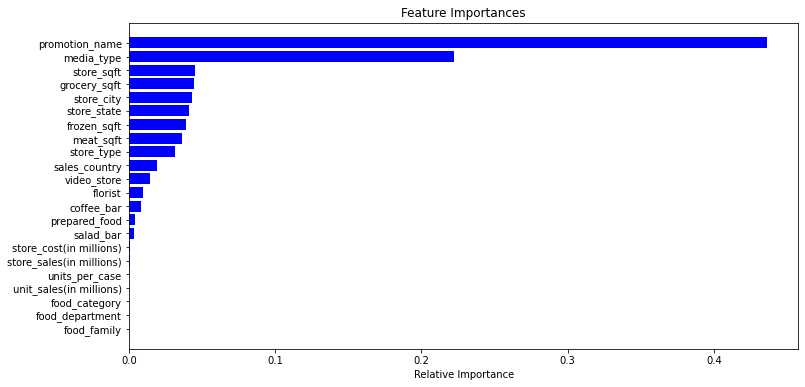

In [137]:
features = predictors
importances = model_rf.feature_importances_
indices = np.argsort(importances)


figs=plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## deployment

Berdasarkan hasil analisis yang dilakukan, kami membuat beberapa strategi dalam menjalankan usaha food mart agar lebih maksimal
- penggunaan promosi yang menarik banyak pelanggan seperti weekend 
markdown, price saver, two day sale, dan price winter digunakan untuk mempromosikan produk yang penjualannya masih rendah seperti candles, canned sarden, hygiene, dan cold remedies. sementara untuk promosi yang kurang menarik konsumen bisa ditingkatkan atau difokuskan ke produk yang memiliki penjualan banyak untuk mempertahankan produk tersebut. hal ini dilakukan untuk meminimalisir biaya dan memaksimalkan keuntungan
- perusahaan bisa memaksimalkan keuntungan dengan cara membuat produk makanan olahan sendiri atau menyediakan restoran untuk pelanggan, hal ini karena selama ini penjualan makanan tertinggi adalah makanan yang siap makan.
- Pada dasarnya usaha foodmart bekerja dengan cara membeli dari pihak lain dan menjualnya kembali, dengan hal tersebut foodmart sangat bergantung pada sektor lain, misalnya pada saat harga hasil pertanian naik foodmart harus menaikan harga yang merugikan foodmart konsumen. Untuk mencegah hal tersebut perusahaan bisa memperluas usaha di bidang pertanian dan peternakan yang merupakan sektor penting bagi usaha foodmart dengan cara menjalankan sendiri atau bekerja sama misalnya menyediakan alat pertanian dan peternakan, pupuk, dan lain sebagainya.
- Promosi memiliki fleksibilitas dan  biaya yang tinggi yang sangat berpengaruh terhadap kondisi keuangan,  penggunaan biaya khususnya biaya promosi disesuaikan dengan kondisi keuangan perusahaan dan keadaan perekonomian, biaya promosi bisa di tingkatan pada saat kondisi keuangan dalam kondisi baik dan harga di tingkat eceran rendah, hal ini karena ketika harga eceran di tingkat rendah keinginan membeli dari konsumen sangat tinggi, hal ini bisa dimanfaatkan oleh perusahaan untuk mendapatkan menaikan penjualan dengan cara menambah promosi dan begitupun sebaliknya  jika kondisi keuangan perusahaan tidak baik dan harga eceran dalam tingkat yang tinggi.
- Melakukan promosi yang intens untuk menaikan penjualan pada coffee bar, dan salad bar. Ini dilakukan karena penjualan tertinggi adalah produk siap makan, sementara coffee bar dan salad bar masih memiliki pengaruh yang kecil terhadap penjualan.
- Berdasarkan data penjualan, 71% adalah makanan dan barang non konsumsi sebesar 19% dan sisanya adalah minuman data ini merupakan hal wajar bagi foodmart karena sebagian besar barang yang tersedia merupakan makanan. Hal ini menunjukan jumlah barang yang dijual menentukan tingkat penjualan, maka  dengan menambah stok barang non konsumsi maka penjualan barang non konsumsi bisa dimaksimalkan dengan target 30% dari semua penjualan, angka tersebut adalah angka yang normal untuk foodmart yang tidak hanya menjual makanan. 


